In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


In [48]:
df = pd.read_csv("df_top5.csv")
df

,Country,League,home_team,away_team,home_score,away_score,season_year,first_half,second_half,home_team_goals_current_time,...,minuto_gol_home,minuto_gol_away,equipo_marco_primero,equipo_ganador,anoto_primero_y_gano,save_ratio_home,save_ratio_away,equipo_mas_faltas,mas_faltas_perdio,gana_quien_mas_amarillas
0,Germany,Bundesliga,B. Monchengladbach,Werder Bremen,4,1,2024/2025,3 - 0,1 - 1,"[""11'"", ""12'"", ""45'"", ""66'""]",...,11.0,75.0,home,home,1,0.800000,0.500000,home,0,False
1,Germany,Bundesliga,Freiburg,Mainz,0,0,2024/2025,0 - 0,0 - 0,NaN,...,NaN,NaN,ninguno,draw,0,1.000000,1.000000,away,1,False
2,Germany,Bundesliga,Dortmund,RB Leipzig,2,1,2024/2025,1 - 1,1 - 0,"[""30'"", ""65'""]",...,30.0,27.0,away,home,0,0.666667,0.714286,away,1,False
3,Germany,Bundesliga,Bayern Munich,Union Berlin,3,0,2024/2025,2 - 0,1 - 0,"[""15'"", ""43'"", ""51'""]",...,15.0,NaN,home,home,1,1.000000,0.571429,away,1,False
4,Germany,Bundesliga,Eintracht Frankfurt,Bochum,7,2,2024/2025,4 - 1,3 - 1,"[""9'"", ""18'"", ""20'"", ""32'"", ""61'"", ""66'"", ""69'""]",...,9.0,35.0,home,home,1,0.750000,0.222222,away,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34980,Spain,Laliga,Valladolid,Rayo Vallecano,1,3,2000/2001,1 - 1,0 - 2,NaN,...,NaN,NaN,ninguno,away,0,NaN,NaN,empate,0,False
34981,Spain,Laliga,Dep. La Coruna,Villarreal,4,2,2000/2001,2 - 0,2 - 2,NaN,...,NaN,NaN,ninguno,home,0,NaN,NaN,empate,0,False
34982,Spain,Laliga,Malaga,Celta Vigo,1,4,2000/2001,1 - 2,0 - 2,NaN,...,NaN,NaN,ninguno,away,0,NaN,NaN,empate,0,False
34983,Spain,Laliga,Real Madrid,Numancia,1,0,2000/2001,1 - 0,0 - 0,NaN,...,NaN,NaN,ninguno,home,0,NaN,NaN,empate,0,False


## EDA

In [49]:
# Miramos de que tipo es cada columna y un vistazo de si hay nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34985 entries, 0 to 34984
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               34985 non-null  object 
 1   League                                34985 non-null  object 
 2   home_team                             34985 non-null  object 
 3   away_team                             34985 non-null  object 
 4   home_score                            34985 non-null  int64  
 5   away_score                            34985 non-null  int64  
 6   season_year                           34985 non-null  object 
 7   first_half                            34853 non-null  object 
 8   second_half                           34875 non-null  object 
 9   home_team_goals_current_time          15234 non-null  object 
 10  home_team_goals                       13129 non-null  object 
 11  home_team_goals

In [50]:
# Miramos cuantos nulos hay y donde.

df.isnull().sum()

Country                                     0
League                                      0
home_team                                   0
away_team                                   0
home_score                                  0
away_score                                  0
season_year                                 0
first_half                                132
second_half                               110
home_team_goals_current_time            19751
home_team_goals                         21856
home_team_goals_assist                  21856
away_team_goals_current_time            21896
away_team_goals                         23477
away_team_goals_assist                  23477
home_team_yellow_card_why               23907
away_team_yellow_card_why               23368
home_team_red_card_why                  33910
away_team_red_card_why                  33730
home_team_substitutions_current_time    19893
home_team_substitutions                 19894
home_team_substitutions_with      

In [51]:
# Miramos un poco como esta el dataset con la media, valores minimos maximos y los percentiles

df.describe()

,home_score,away_score,expected_goals_xg_home,expected_goals_xg_away,Ball_Possession_Home,Ball_Possession_Away,Shots_on_Goal_Home,Shots_on_Goal_Away,Offsides_Home,Offsides_Away,...,Total_Passes_Home,Total_Passes_Away,diferencia_goles,total_goles,minuto_gol_home,minuto_gol_away,anoto_primero_y_gano,save_ratio_home,save_ratio_away,mas_faltas_perdio
count,34985.000000,34985.000000,2667.000000,2667.000000,17407.000000,17407.000000,17407.000000,17407.000000,34985.000000,34985.000000,...,7433.000000,7433.000000,34985.000000,34985.00000,15222.000000,13081.000000,34985.000000,1.686100e+04,1.713500e+04,34985.000000
mean,1.538517,1.172274,1.588361,1.249516,51.115298,48.884874,4.976963,4.097662,1.016750,0.925825,...,462.931656,441.078030,1.346949,2.71079,28.068913,30.189206,0.385108,inf,inf,0.295012
std,1.287976,1.139893,0.908953,0.781945,10.689989,10.689999,2.728617,2.421370,1.569746,1.459752,...,139.237669,127.369141,1.202924,1.67011,23.480301,24.577206,0.486628,NaN,NaN,0.456055
min,0.000000,0.000000,0.000000,0.000000,18.000000,16.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,0.000000,0.910000,0.670000,44.000000,41.000000,3.000000,2.000000,0.000000,0.000000,...,367.000000,350.000000,0.000000,2.00000,8.000000,9.000000,0.000000,5.000000e-01,5.000000e-01,0.000000
50%,1.000000,1.000000,1.430000,1.120000,51.000000,49.000000,5.000000,4.000000,0.000000,0.000000,...,449.000000,428.000000,1.000000,3.00000,22.000000,24.000000,0.000000,7.142857e-01,6.666667e-01,0.000000
75%,2.000000,2.000000,2.140000,1.660000,59.000000,56.000000,7.000000,6.000000,2.000000,2.000000,...,547.000000,520.000000,2.000000,4.00000,43.000000,48.000000,1.000000,1.000000e+00,8.571429e-01,1.000000
max,9.000000,9.000000,7.200000,4.550000,84.000000,82.000000,22.000000,20.000000,12.000000,12.000000,...,3411.000000,975.000000,9.000000,11.00000,90.000000,90.000000,1.000000,inf,inf,1.000000


In [52]:
df

,Country,League,home_team,away_team,home_score,away_score,season_year,first_half,second_half,home_team_goals_current_time,...,minuto_gol_home,minuto_gol_away,equipo_marco_primero,equipo_ganador,anoto_primero_y_gano,save_ratio_home,save_ratio_away,equipo_mas_faltas,mas_faltas_perdio,gana_quien_mas_amarillas
0,Germany,Bundesliga,B. Monchengladbach,Werder Bremen,4,1,2024/2025,3 - 0,1 - 1,"[""11'"", ""12'"", ""45'"", ""66'""]",...,11.0,75.0,home,home,1,0.800000,0.500000,home,0,False
1,Germany,Bundesliga,Freiburg,Mainz,0,0,2024/2025,0 - 0,0 - 0,NaN,...,NaN,NaN,ninguno,draw,0,1.000000,1.000000,away,1,False
2,Germany,Bundesliga,Dortmund,RB Leipzig,2,1,2024/2025,1 - 1,1 - 0,"[""30'"", ""65'""]",...,30.0,27.0,away,home,0,0.666667,0.714286,away,1,False
3,Germany,Bundesliga,Bayern Munich,Union Berlin,3,0,2024/2025,2 - 0,1 - 0,"[""15'"", ""43'"", ""51'""]",...,15.0,NaN,home,home,1,1.000000,0.571429,away,1,False
4,Germany,Bundesliga,Eintracht Frankfurt,Bochum,7,2,2024/2025,4 - 1,3 - 1,"[""9'"", ""18'"", ""20'"", ""32'"", ""61'"", ""66'"", ""69'""]",...,9.0,35.0,home,home,1,0.750000,0.222222,away,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34980,Spain,Laliga,Valladolid,Rayo Vallecano,1,3,2000/2001,1 - 1,0 - 2,NaN,...,NaN,NaN,ninguno,away,0,NaN,NaN,empate,0,False
34981,Spain,Laliga,Dep. La Coruna,Villarreal,4,2,2000/2001,2 - 0,2 - 2,NaN,...,NaN,NaN,ninguno,home,0,NaN,NaN,empate,0,False
34982,Spain,Laliga,Malaga,Celta Vigo,1,4,2000/2001,1 - 2,0 - 2,NaN,...,NaN,NaN,ninguno,away,0,NaN,NaN,empate,0,False
34983,Spain,Laliga,Real Madrid,Numancia,1,0,2000/2001,1 - 0,0 - 0,NaN,...,NaN,NaN,ninguno,home,0,NaN,NaN,empate,0,False


In [53]:
# Paso 3: Filtramos las columnas importantes
columnas_utiles = [
    'Ball_Possession_Home', 'Ball_Possession_Away', 'Shots_on_Goal_Home', 'Shots_on_Goal_Away',
    'Fouls_Home', 'Fouls_Away', 'Yellow_Cards_Home', 'Yellow_Cards_Away', 'Red_Cards_Home', 'Red_Cards_Away',
    'expected_goals_xg_home', 'expected_goals_xg_away', 'Goalkeeper_Saves_Home', 'Goalkeeper_Saves_Away',
    'Offsides_Home', 'Offsides_Away', 'Total_Passes_Home', 'Total_Passes_Away',
    'save_ratio_home', 'save_ratio_away', 'League', 'home_team', 'away_team', 'season_year', 'home_score', 'away_score'
]
df = df[columnas_utiles + ['resultado']]

In [54]:
# Paso 4: Codificamos la variable target ('resultado') como 0=local, 1=empate, 2=visitante
mapeo_resultado = {'local': 0, 'empate': 1, 'visitante': 2}
df['target'] = df['resultado'].map(mapeo_resultado)
df.drop(columns=['resultado'], inplace=True)    


In [55]:
df

,Ball_Possession_Home,Ball_Possession_Away,Shots_on_Goal_Home,Shots_on_Goal_Away,Fouls_Home,Fouls_Away,Yellow_Cards_Home,Yellow_Cards_Away,Red_Cards_Home,Red_Cards_Away,...,Total_Passes_Away,save_ratio_home,save_ratio_away,League,home_team,away_team,season_year,home_score,away_score,target
0,47.0,53.0,8.0,5.0,12.0,10.0,1.0,4.0,0.0,1.0,...,549.0,0.800000,0.500000,Bundesliga,B. Monchengladbach,Werder Bremen,2024/2025,4,1,0
1,51.0,49.0,2.0,2.0,9.0,12.0,1.0,2.0,0.0,0.0,...,443.0,1.000000,1.000000,Bundesliga,Freiburg,Mainz,2024/2025,0,0,1
2,56.0,44.0,7.0,3.0,11.0,12.0,3.0,4.0,0.0,0.0,...,418.0,0.666667,0.714286,Bundesliga,Dortmund,RB Leipzig,2024/2025,2,1,0
3,77.0,23.0,7.0,1.0,2.0,9.0,0.0,2.0,0.0,0.0,...,244.0,1.000000,0.571429,Bundesliga,Bayern Munich,Union Berlin,2024/2025,3,0,0
4,65.0,35.0,9.0,8.0,6.0,15.0,1.0,2.0,0.0,0.0,...,324.0,0.750000,0.222222,Bundesliga,Eintracht Frankfurt,Bochum,2024/2025,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34980,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Laliga,Valladolid,Rayo Vallecano,2000/2001,1,3,2
34981,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Laliga,Dep. La Coruna,Villarreal,2000/2001,4,2,0
34982,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Laliga,Malaga,Celta Vigo,2000/2001,1,4,2
34983,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Laliga,Real Madrid,Numancia,2000/2001,1,0,0


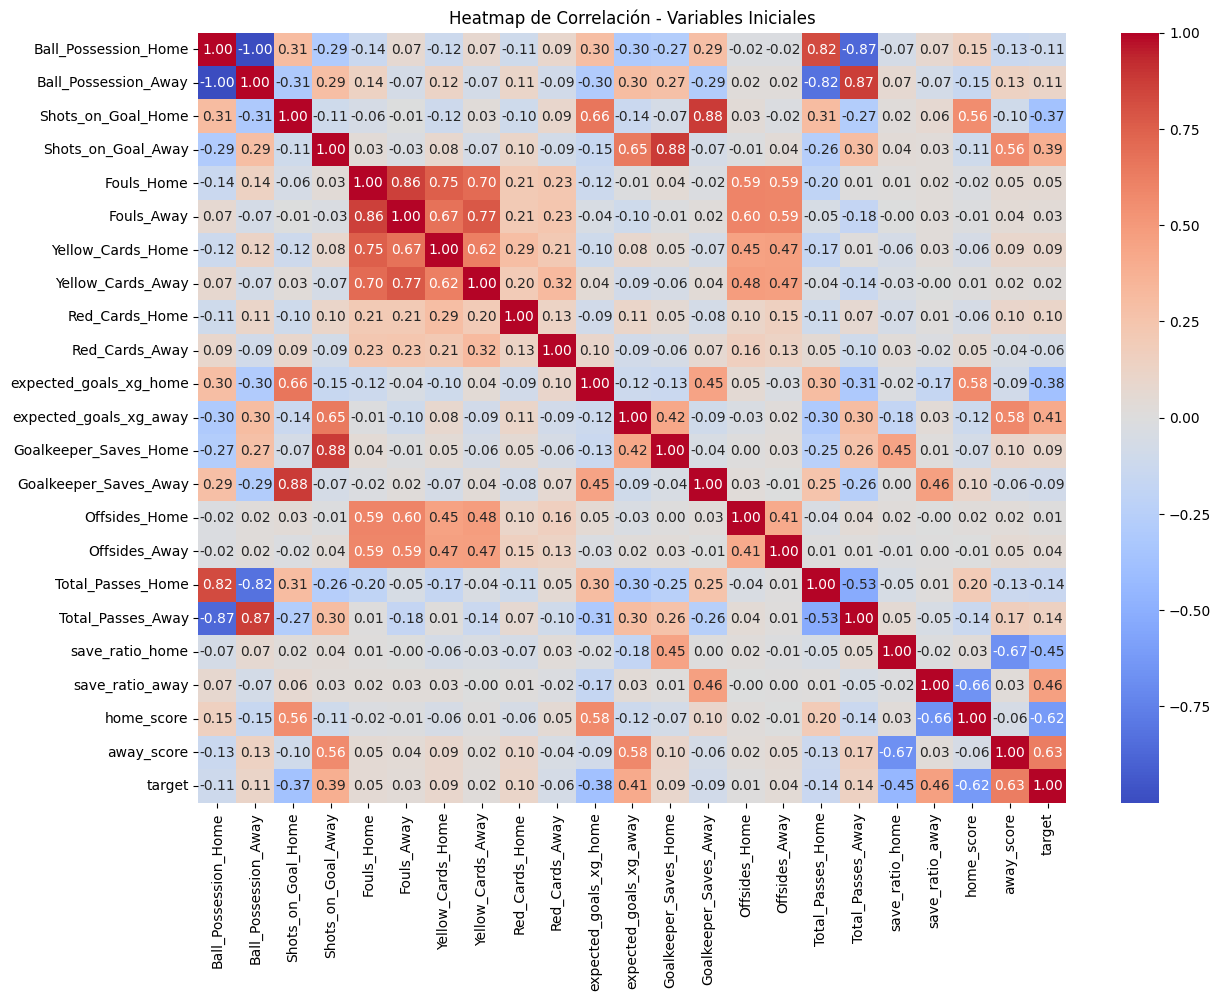

In [56]:
# Heatmap de correlación entre variables
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlación - Variables Iniciales')
plt.show()

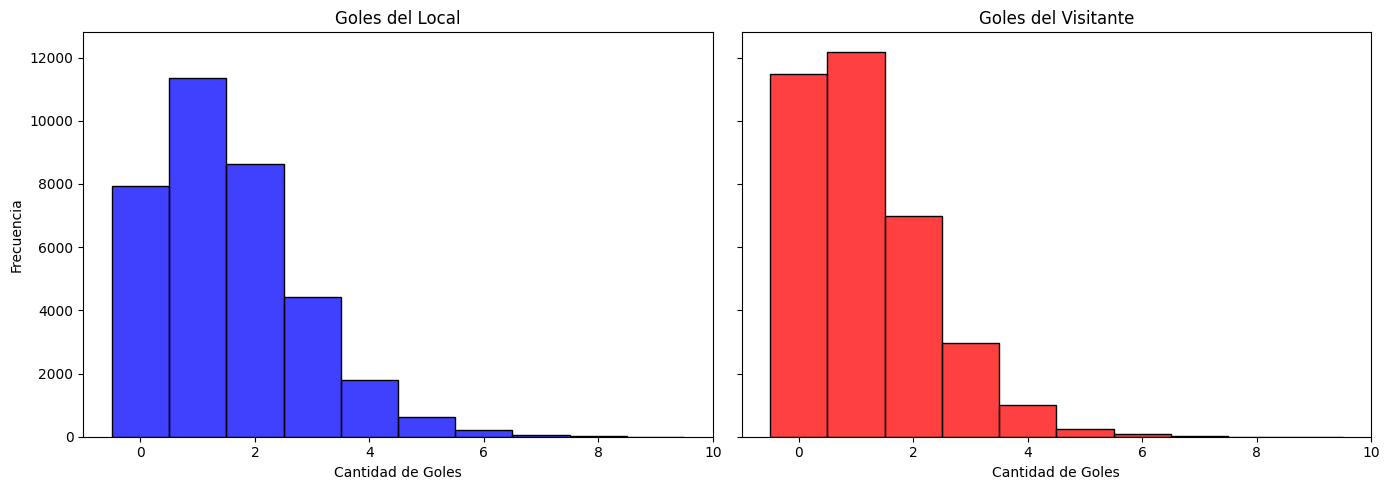

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(df['home_score'], bins=range(0, 9), kde=False, color='blue', ax=axes[0], discrete=True)
axes[0].set_title('Goles del Local')
axes[0].set_xlabel('Cantidad de Goles')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df['away_score'], bins=range(0, 9), kde=False, color='red', ax=axes[1], discrete=True)
axes[1].set_title('Goles del Visitante')
axes[1].set_xlabel('Cantidad de Goles')

plt.tight_layout()
plt.show()


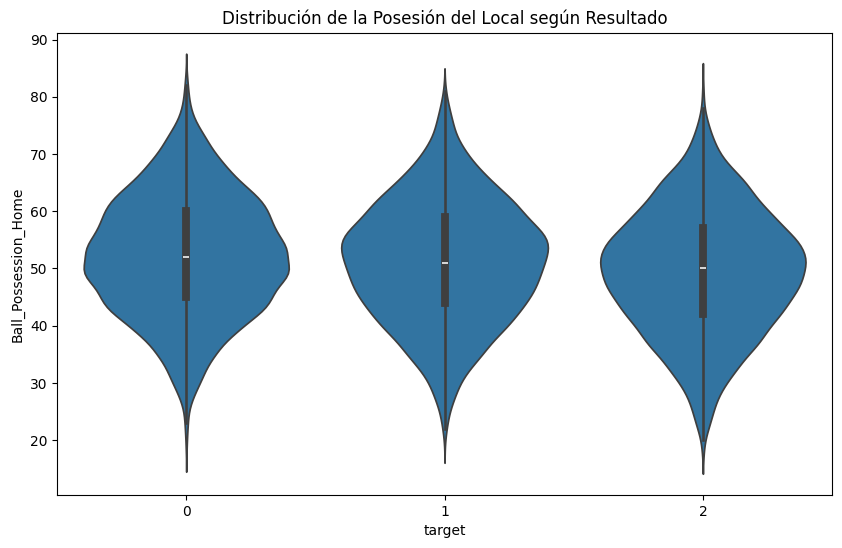

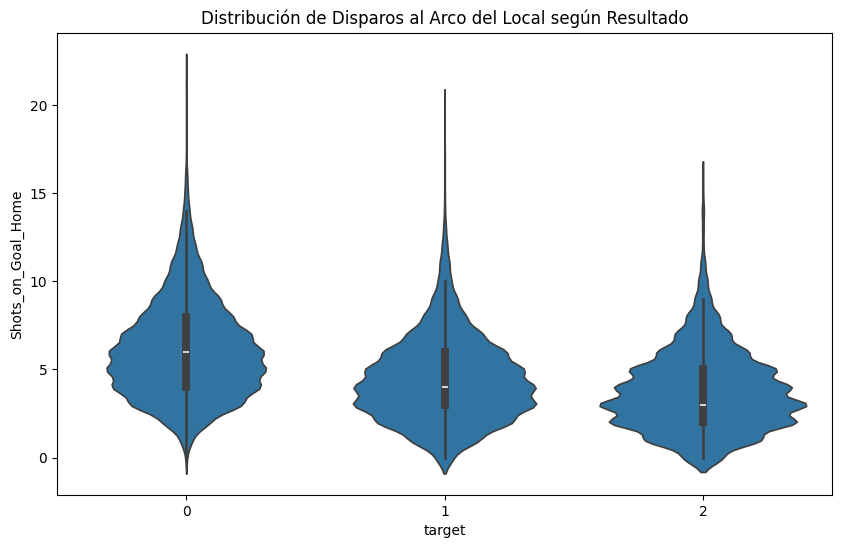

In [58]:
# Visualizaciones complementarias: Distribuciones por clase
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='Ball_Possession_Home', data=df)
plt.title('Distribución de la Posesión del Local según Resultado')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='Shots_on_Goal_Home', data=df)
plt.title('Distribución de Disparos al Arco del Local según Resultado')
plt.show()

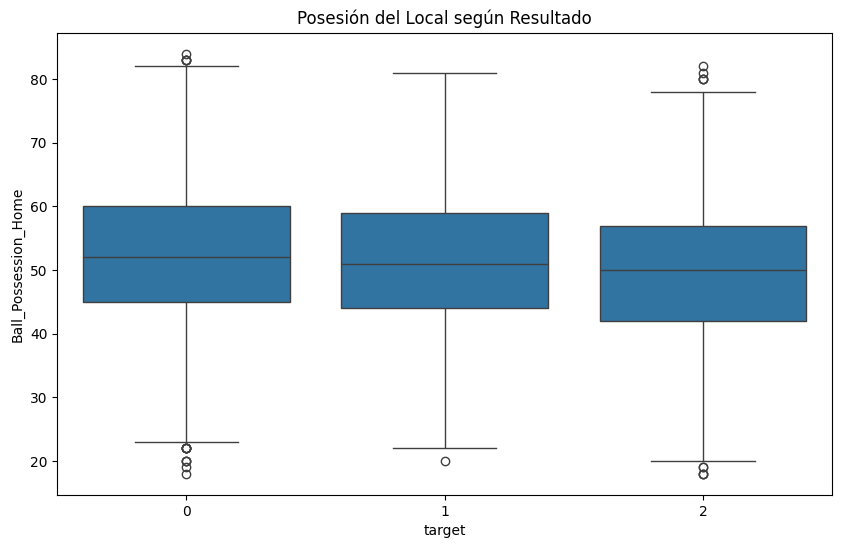

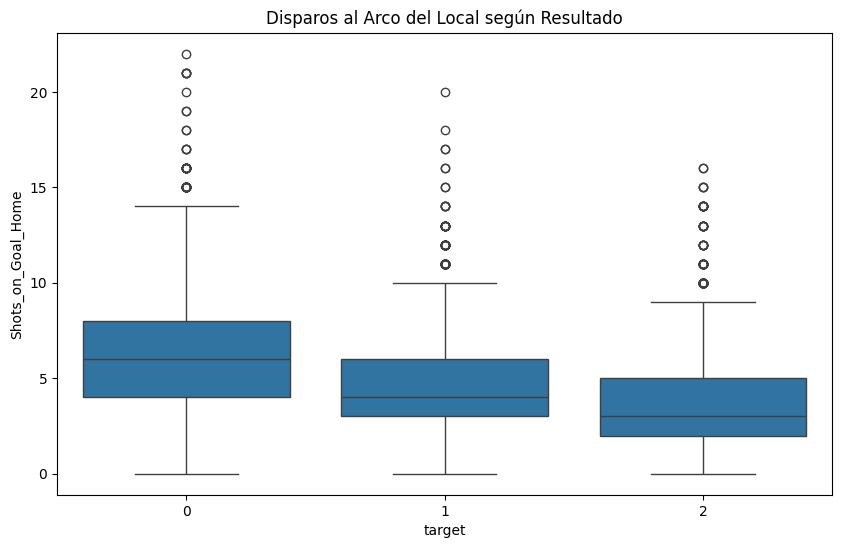

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='Ball_Possession_Home', data=df)
plt.title('Posesión del Local según Resultado')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='target', y='Shots_on_Goal_Home', data=df)
plt.title('Disparos al Arco del Local según Resultado')
plt.show()


## Feature Engiengineering

### Sacar medianas de Xg de cada equipos dependiendo su localia.

In [60]:
# Calcular medianas por equipo y localía
medianas_local = df.groupby('home_team')['expected_goals_xg_home'].median()
medianas_visitante = df.groupby('away_team')['expected_goals_xg_away'].median()

# Calcular mediana general solo si ambas columnas existen (para el mismo equipo)
# Ejemplo: Arsenal local + visitante → Arsenal general
df['all_xg_local'] = df['expected_goals_xg_home']
df['all_xg_visitante'] = df['expected_goals_xg_away']

general_local = df[['home_team', 'all_xg_local']].rename(columns={'home_team': 'team'}).groupby('team')['all_xg_local'].median()
general_visitante = df[['away_team', 'all_xg_visitante']].rename(columns={'away_team': 'team'}).groupby('team')['all_xg_visitante'].median()

# Función para rellenar home
def fill_xg_home(row):
    if pd.notnull(row['expected_goals_xg_home']):
        return row['expected_goals_xg_home']
    team = row['home_team']
    if team in medianas_local and not np.isnan(medianas_local[team]):
        return medianas_local[team]
    if team in general_local and not np.isnan(general_local[team]):
        return general_local[team]
    return df['expected_goals_xg_home'].median()

# Función para rellenar away
def fill_xg_away(row):
    if pd.notnull(row['expected_goals_xg_away']):
        return row['expected_goals_xg_away']
    team = row['away_team']
    if team in medianas_visitante and not np.isnan(medianas_visitante[team]):
        return medianas_visitante[team]
    if team in general_visitante and not np.isnan(general_visitante[team]):
        return general_visitante[team]
    return df['expected_goals_xg_away'].median()

# Aplicar funciones
df['expected_goals_xg_home'] = df.apply(fill_xg_home, axis=1)
df['expected_goals_xg_away'] = df.apply(fill_xg_away, axis=1)

# Limpiar columnas temporales
df.drop(columns=['all_xg_local', 'all_xg_visitante'], inplace=True)


### Sacar medianas de posesión de balon de cada equipos dependiendo su localia.

In [61]:
# Calcular medianas por equipo local/visitante
medianas_pos_local = df.groupby('home_team')['Ball_Possession_Home'].median()
medianas_pos_visitante = df.groupby('away_team')['Ball_Possession_Away'].median()

# Calcular mediana general del equipo (local + visitante)
df['all_pos_home'] = df['Ball_Possession_Home']
df['all_pos_away'] = df['Ball_Possession_Away']

general_pos_home = df[['home_team', 'all_pos_home']].rename(columns={'home_team': 'team'}).groupby('team')['all_pos_home'].median()
general_pos_away = df[['away_team', 'all_pos_away']].rename(columns={'away_team': 'team'}).groupby('team')['all_pos_away'].median()

# Calcular mediana global solo para partidos local/visitante
global_pos_home = df['Ball_Possession_Home'].median()
global_pos_away = df['Ball_Possession_Away'].median()

# Función para rellenar home
def fill_pos_home(row):
    if pd.notnull(row['Ball_Possession_Home']):
        return row['Ball_Possession_Home']
    team = row['home_team']
    if team in medianas_pos_local and not np.isnan(medianas_pos_local[team]):
        return medianas_pos_local[team]
    if team in general_pos_home and not np.isnan(general_pos_home[team]):
        return general_pos_home[team]
    return global_pos_home

# Función para rellenar away
def fill_pos_away(row):
    if pd.notnull(row['Ball_Possession_Away']):
        return row['Ball_Possession_Away']
    team = row['away_team']
    if team in medianas_pos_visitante and not np.isnan(medianas_pos_visitante[team]):
        return medianas_pos_visitante[team]
    if team in general_pos_away and not np.isnan(general_pos_away[team]):
        return general_pos_away[team]
    return global_pos_away

# Aplicar
df['Ball_Possession_Home'] = df.apply(fill_pos_home, axis=1)
df['Ball_Possession_Away'] = df.apply(fill_pos_away, axis=1)

# Limpiar columnas temporales
df.drop(columns=['all_pos_home', 'all_pos_away'], inplace=True)


### Sacar paradas del portero.

In [62]:
# Calcular medianas por equipo y localía
medianas_shots_local = df.groupby('home_team')['Shots_on_Goal_Home'].median()
medianas_shots_visitante = df.groupby('away_team')['Shots_on_Goal_Away'].median()

# Calcular mediana general por equipo
df['all_shots'] = df[['Shots_on_Goal_Home', 'Shots_on_Goal_Away']].mean(axis=1)
medianas_shots_equipo = pd.concat([
    df[['home_team', 'all_shots']].rename(columns={'home_team': 'team'}),
    df[['away_team', 'all_shots']].rename(columns={'away_team': 'team'})
]).groupby('team')['all_shots'].median()

# Función para rellenar Shots_on_Goal_Home
def fill_shots_home(row):
    if pd.notnull(row['Shots_on_Goal_Home']):
        return row['Shots_on_Goal_Home']
    team = row['home_team']
    if team in medianas_shots_local and not np.isnan(medianas_shots_local[team]):
        return medianas_shots_local[team]
    if team in medianas_shots_equipo and not np.isnan(medianas_shots_equipo[team]):
        return medianas_shots_equipo[team]
    return df['Shots_on_Goal_Home'].median()

# Función para rellenar Shots_on_Goal_Away
def fill_shots_away(row):
    if pd.notnull(row['Shots_on_Goal_Away']):
        return row['Shots_on_Goal_Away']
    team = row['away_team']
    if team in medianas_shots_visitante and not np.isnan(medianas_shots_visitante[team]):
        return medianas_shots_visitante[team]
    if team in medianas_shots_equipo and not np.isnan(medianas_shots_equipo[team]):
        return medianas_shots_equipo[team]
    return df['Shots_on_Goal_Away'].median()

# Aplicar funciones
df['Shots_on_Goal_Home'] = df.apply(fill_shots_home, axis=1)
df['Shots_on_Goal_Away'] = df.apply(fill_shots_away, axis=1)

# Limpiar columna temporal
df.drop(columns=['all_shots'], inplace=True)


In [63]:
# Paradas portero local (portero del home → calcula usando tiros del away)
df['Goalkeeper_Saves_Home'] = df.apply(
    lambda row: max(row['Shots_on_Goal_Away'] - row['away_score'], 0)
    if pd.isna(row['Goalkeeper_Saves_Home']) and 
       pd.notnull(row['Shots_on_Goal_Away']) and 
       pd.notnull(row['away_score'])
    else row['Goalkeeper_Saves_Home'],
    axis=1
)

# Paradas portero visitante (portero del away → calcula usando tiros del home)
df['Goalkeeper_Saves_Away'] = df.apply(
    lambda row: max(row['Shots_on_Goal_Home'] - row['home_score'], 0)
    if pd.isna(row['Goalkeeper_Saves_Away']) and 
       pd.notnull(row['Shots_on_Goal_Home']) and 
       pd.notnull(row['home_score'])
    else row['Goalkeeper_Saves_Away'],
    axis=1
)

In [64]:
# Recalcular save_ratio de forma segura
df['save_ratio_home'] = df.apply(
    lambda row: row['Goalkeeper_Saves_Home'] / row['Shots_on_Goal_Away']
    if pd.notnull(row['Goalkeeper_Saves_Home']) and 
       pd.notnull(row['Shots_on_Goal_Away']) and 
       row['Shots_on_Goal_Away'] > 0
    else 0,
    axis=1
)

df['save_ratio_away'] = df.apply(
    lambda row: row['Goalkeeper_Saves_Away'] / row['Shots_on_Goal_Home']
    if pd.notnull(row['Goalkeeper_Saves_Away']) and 
       pd.notnull(row['Shots_on_Goal_Home']) and 
       row['Shots_on_Goal_Home'] > 0
    else 0,
    axis=1
)

In [65]:
# Nos quitamos las columnas donde Goalkeeper_Saves_X es mayor que Shots_on_Goal_X

df = df[
    (df['Goalkeeper_Saves_Home'] <= df['Shots_on_Goal_Away']) &
    (df['Goalkeeper_Saves_Away'] <= df['Shots_on_Goal_Home'])
].reset_index(drop=True)


In [66]:
# Para ver los partidos con más de 600 pases del equipo local
df[df['Total_Passes_Home'] > 950]



,Ball_Possession_Home,Ball_Possession_Away,Shots_on_Goal_Home,Shots_on_Goal_Away,Fouls_Home,Fouls_Away,Yellow_Cards_Home,Yellow_Cards_Away,Red_Cards_Home,Red_Cards_Away,...,Total_Passes_Away,save_ratio_home,save_ratio_away,League,home_team,away_team,season_year,home_score,away_score,target
654,44.0,56.0,9.0,0.0,14.0,10.0,1.0,1.0,0.0,0.0,...,525.0,0.0,0.555556,Bundesliga,Eintracht Frankfurt,RB Leipzig,2022/2023,4,0,0
1641,82.0,18.0,11.0,2.0,3.0,11.0,0.0,3.0,0.0,0.0,...,233.0,0.5,0.454545,Bundesliga,Bayer Leverkusen,Eintracht Frankfurt,2018/2019,6,1,0
1732,84.0,16.0,7.0,0.0,6.0,11.0,1.0,3.0,0.0,0.0,...,188.0,0.0,0.714286,Bundesliga,Bayer Leverkusen,Dusseldorf,2018/2019,2,0,0
7715,78.0,22.0,4.0,0.0,8.0,6.0,0.0,0.0,0.0,0.0,...,286.0,0.0,1.000000,Ligue-1,PSG,Lorient,2023/2024,0,0,1
14472,82.0,18.0,4.0,2.0,5.0,6.0,1.0,1.0,0.0,0.0,...,233.0,1.0,0.500000,Premier-league,Manchester City,Sheffield Utd,2023/2024,2,0,0
15974,75.0,25.0,7.0,2.0,5.0,8.0,0.0,0.0,0.0,0.0,...,327.0,1.0,0.714286,Premier-league,Liverpool,Sheffield Utd,2019/2020,2,0,0
16093,31.0,69.0,2.0,3.0,10.0,12.0,4.0,4.0,0.0,0.0,...,633.0,1.0,0.500000,Premier-league,Sheffield Utd,Arsenal,2019/2020,1,0,0
16599,83.0,17.0,12.0,1.0,6.0,8.0,0.0,1.0,0.0,0.0,...,203.0,1.0,0.583333,Premier-league,Manchester City,Swansea,2017/2018,5,0,0
16653,71.0,29.0,3.0,0.0,8.0,9.0,2.0,1.0,0.0,0.0,...,392.0,0.0,0.666667,Premier-league,Manchester City,Chelsea,2017/2018,1,0,0


In [67]:
# Para ver los partidos con más de 600 pases del equipo visitante
df[df['Total_Passes_Away'] > 950]

,Ball_Possession_Home,Ball_Possession_Away,Shots_on_Goal_Home,Shots_on_Goal_Away,Fouls_Home,Fouls_Away,Yellow_Cards_Home,Yellow_Cards_Away,Red_Cards_Home,Red_Cards_Away,...,Total_Passes_Away,save_ratio_home,save_ratio_away,League,home_team,away_team,season_year,home_score,away_score,target
16630,18.0,82.0,2.0,4.0,10.0,8.0,0.0,0.0,0.0,0.0,...,975.0,0.25,0.5,Premier-league,Everton,Manchester City,2017/2018,1,3,2


In [68]:
df.loc[df['Total_Passes_Home'] == 3411.0, 'Total_Passes_Home'] = 460
df.loc[df['Total_Passes_Home'] == 2288.0, 'Total_Passes_Home'] = 287
df.loc[(df['Total_Passes_Home'] == 1000.0), 'Total_Passes_Home'] = 938
df.loc[df['Total_Passes_Home'] == 1015.0, 'Total_Passes_Home'] = 942
df.loc[df['Total_Passes_Home'] == 976.0,  'Total_Passes_Home'] = 902


###  Rellenar offsides con la mediana y localia

In [69]:
# Calcular medianas
medianas_offsides_local = df.groupby('home_team')['Offsides_Home'].median()
medianas_offsides_visitante = df.groupby('away_team')['Offsides_Away'].median()

df['all_offsides_home'] = df['Offsides_Home']
df['all_offsides_away'] = df['Offsides_Away']

general_offsides_home = df[['home_team', 'all_offsides_home']].rename(columns={'home_team': 'team'}).groupby('team')['all_offsides_home'].median()
general_offsides_away = df[['away_team', 'all_offsides_away']].rename(columns={'away_team': 'team'}).groupby('team')['all_offsides_away'].median()

# Funciones
def fill_offsides_home(row):
    if pd.notnull(row['Offsides_Home']):
        return row['Offsides_Home']
    team = row['home_team']
    if team in medianas_offsides_local:
        return medianas_offsides_local[team]
    if team in general_offsides_home:
        return general_offsides_home[team]
    return df['Offsides_Home'].median()

def fill_offsides_away(row):
    if pd.notnull(row['Offsides_Away']):
        return row['Offsides_Away']
    team = row['away_team']
    if team in medianas_offsides_visitante:
        return medianas_offsides_visitante[team]
    if team in general_offsides_away:
        return general_offsides_away[team]
    return df['Offsides_Away'].median()

# Aplicar
df['Offsides_Home'] = df.apply(fill_offsides_home, axis=1)
df['Offsides_Away'] = df.apply(fill_offsides_away, axis=1)

# Limpiar
df.drop(columns=['all_offsides_home', 'all_offsides_away'], inplace=True)


### Rellenar total de pases con mediana y localia

In [70]:
# Calcular medianas por equipo y general
medianas_passes_local = df.groupby('home_team')['Total_Passes_Home'].median().dropna()
medianas_passes_visitante = df.groupby('away_team')['Total_Passes_Away'].median().dropna()

df['all_passes_home'] = df['Total_Passes_Home']
df['all_passes_away'] = df['Total_Passes_Away']

general_passes_home = df[['home_team', 'all_passes_home']].rename(columns={'home_team': 'team'}).groupby('team')['all_passes_home'].median().dropna()
general_passes_away = df[['away_team', 'all_passes_away']].rename(columns={'away_team': 'team'}).groupby('team')['all_passes_away'].median().dropna()

# Mediana global SOLO de equipos que jugaron de local / visitante
global_home_only_median = df['Total_Passes_Home'].dropna().median()
global_away_only_median = df['Total_Passes_Away'].dropna().median()

# Funciones con prioridad: local → general equipo → mediana local global
def fill_passes_home(row):
    if pd.notnull(row['Total_Passes_Home']):
        return row['Total_Passes_Home']
    team = row['home_team']
    val = medianas_passes_local.get(team)
    if pd.notnull(val):
        return val
    val = general_passes_home.get(team)
    if pd.notnull(val):
        return val
    return global_home_only_median

def fill_passes_away(row):
    if pd.notnull(row['Total_Passes_Away']):
        return row['Total_Passes_Away']
    team = row['away_team']
    val = medianas_passes_visitante.get(team)
    if pd.notnull(val):
        return val
    val = general_passes_away.get(team)
    if pd.notnull(val):
        return val
    return global_away_only_median

# Aplicar
df['Total_Passes_Home'] = df.apply(fill_passes_home, axis=1)
df['Total_Passes_Away'] = df.apply(fill_passes_away, axis=1)

# Limpiar
df.drop(columns=['all_passes_home', 'all_passes_away'], inplace=True)



## Preparar el dataset

In [71]:
# Paso 5: Análisis de ligas y temporadas
# ¿Cuántas ligas hay?
ligas = df['League'].nunique()
print(f"Cantidad de ligas: {ligas}")

# ¿Cuántas temporadas por liga?
temporadas_por_liga = df.groupby('League')['season_year'].nunique()
print("Temporadas por liga:")
print(temporadas_por_liga)

# ¿Cuántos partidos por liga y temporada?
partidos_por_liga_temporada = df.groupby(['League', 'season_year']).size()
print("\nPartidos por liga y temporada:")
print(partidos_por_liga_temporada)

# ¿Total de partidos por liga?
partidos_totales_por_liga = df['League'].value_counts()
print("\nTotal de partidos por liga:")
print(partidos_totales_por_liga)

Cantidad de ligas: 5
Temporadas por liga:
League
Bundesliga        25
Laliga            24
Ligue-1           20
Premier-league    25
Serie-a           25
Name: season_year, dtype: int64

Partidos por liga y temporada:
League      season_year
Bundesliga  2000/2001      306
            2001/2002      306
            2002/2003      306
            2003/2004      306
            2004/2005      306
                          ... 
Serie-a     2020/2021      380
            2021/2022      380
            2022/2023      381
            2023/2024      380
            2024/2025      157
Length: 119, dtype: int64

Total de partidos por liga:
League
Premier-league    9218
Serie-a           8989
Bundesliga        7299
Ligue-1           6884
Laliga            2583
Name: count, dtype: int64


In [72]:
# Paso 5: Nos quedamos solo con la Premier League
df = df[df['League'] == 'Premier-league']

In [73]:
# Paso 6: Análisis de temporadas

# Última temporada
ultima_temporada = df['season_year'].max()
print(f"Última temporada disponible: {ultima_temporada}")

Última temporada disponible: 2024/2025


In [74]:
# Paso 7: Estadísticas medias por equipo

# Local
stats_home = df.groupby('home_team').agg({
    'Ball_Possession_Home': 'mean', 'Shots_on_Goal_Home': 'mean', 'Fouls_Home': 'mean',
    'Yellow_Cards_Home': 'mean', 'Red_Cards_Home': 'mean', 'expected_goals_xg_home': 'mean',
    'Goalkeeper_Saves_Home': 'mean', 'Offsides_Home': 'mean', 'Total_Passes_Home': 'mean', 'save_ratio_home': 'mean'
}).reset_index().rename(columns={'home_team': 'team'})

# Visitante
stats_away = df.groupby('away_team').agg({
    'Ball_Possession_Away': 'mean', 'Shots_on_Goal_Away': 'mean', 'Fouls_Away': 'mean',
    'Yellow_Cards_Away': 'mean', 'Red_Cards_Away': 'mean', 'expected_goals_xg_away': 'mean',
    'Goalkeeper_Saves_Away': 'mean', 'Offsides_Away': 'mean', 'Total_Passes_Away': 'mean', 'save_ratio_away': 'mean'
}).reset_index().rename(columns={'away_team': 'team'})

In [75]:
# Paso 8: Eliminamos equipos filiales (nombres con un "2")
stats_home = stats_home[~stats_home['team'].str.contains("2")]
stats_away = stats_away[~stats_away['team'].str.contains("2")]

In [76]:
stats_home

,team,Ball_Possession_Home,Shots_on_Goal_Home,Fouls_Home,Yellow_Cards_Home,Red_Cards_Home,expected_goals_xg_home,Goalkeeper_Saves_Home,Offsides_Home,Total_Passes_Home,save_ratio_home
0,Arsenal,59.429501,6.028200,4.713666,0.713666,0.030369,2.311855,2.722343,1.013015,544.991323,0.736096
1,Aston Villa,48.304455,4.126238,4.279703,0.747525,0.027228,1.831683,2.732673,0.589109,416.626238,0.683172
2,Birmingham,51.000000,5.000000,0.000000,0.000000,0.000000,1.430000,2.661654,0.000000,449.000000,0.692105
3,Blackburn,51.000000,5.000000,0.000000,0.000000,0.000000,1.430000,2.531100,0.000000,449.000000,0.659011
4,Blackpool,51.000000,5.000000,0.000000,0.000000,0.000000,1.430000,1.868421,0.000000,449.000000,0.476023
5,Bolton,51.000000,5.000000,0.000000,0.000000,0.000000,1.430000,2.435407,0.000000,449.000000,0.647767
6,Bournemouth,46.978102,4.291971,10.167883,1.722628,0.051095,1.516496,2.941606,1.459854,402.510949,0.651726
7,Bradford City,51.000000,5.000000,0.000000,0.000000,0.000000,1.430000,2.315789,0.000000,449.000000,0.570175
8,Brentford,45.693548,4.790323,9.080645,1.709677,0.064516,1.653387,3.209677,1.741935,394.209677,0.668419
9,Brighton,53.253623,4.420290,11.072464,1.739130,0.050725,1.817826,2.521739,1.985507,490.362319,0.624523


In [77]:
stats_away

,team,Ball_Possession_Away,Shots_on_Goal_Away,Fouls_Away,Yellow_Cards_Away,Red_Cards_Away,expected_goals_xg_away,Goalkeeper_Saves_Away,Offsides_Away,Total_Passes_Away,save_ratio_away
0,Arsenal,56.368192,4.178649,4.570806,0.823529,0.039216,1.349390,3.252723,0.825708,529.908497,0.720031
2,Aston Villa,46.861386,3.254950,4.549505,0.868812,0.024752,1.311683,3.160891,0.633663,394.641089,0.651812
3,Birmingham,49.000000,4.000000,0.000000,0.000000,0.000000,1.120000,3.052632,0.000000,428.000000,0.633405
4,Blackburn,49.000000,4.000000,0.000000,0.000000,0.000000,1.120000,2.980861,0.000000,428.000000,0.627182
5,Blackpool,49.000000,4.000000,0.000000,0.000000,0.000000,1.120000,2.421053,0.000000,428.000000,0.505639
6,Bolton,49.000000,4.000000,0.000000,0.000000,0.000000,1.120000,2.937799,0.000000,428.000000,0.610583
7,Bournemouth,45.695652,3.746377,10.195652,1.760870,0.036232,1.344058,3.391304,1.543478,396.913043,0.629201
8,Bradford City,49.000000,4.000000,0.000000,0.000000,0.000000,1.120000,2.684211,0.000000,428.000000,0.549499
9,Brentford,43.290323,3.935484,9.903226,1.919355,0.032258,1.298065,4.258065,1.919355,377.693548,0.685732
10,Brighton,51.123188,3.905797,10.898551,1.652174,0.086957,1.334058,3.094203,1.833333,476.920290,0.663185


In [78]:
# Paso 9: Unimos las estadísticas al dataset principal
# Excluimos la última temporada (la reservamos para evaluación final)

df_model = df[df['season_year'] < ultima_temporada].copy()

In [79]:
# Unimos estadísticas del equipo local y visitante
df_model = df_model.merge(stats_home, how='left', left_on='home_team', right_on='team', suffixes=('', '_local'))
df_model = df_model.merge(stats_away, how='left', left_on='away_team', right_on='team', suffixes=('', '_away'))

In [80]:
# Eliminamos columnas innecesarias
df_model.drop(columns=['League', 'home_team', 'away_team', 'season_year', 'home_score', 'away_score', 'team', 'team_away'], inplace=True)

In [81]:
df_model

,Ball_Possession_Home,Ball_Possession_Away,Shots_on_Goal_Home,Shots_on_Goal_Away,Fouls_Home,Fouls_Away,Yellow_Cards_Home,Yellow_Cards_Away,Red_Cards_Home,Red_Cards_Away,...,Ball_Possession_Away_away,Shots_on_Goal_Away_away,Fouls_Away_away,Yellow_Cards_Away_away,Red_Cards_Away_away,expected_goals_xg_away_away,Goalkeeper_Saves_Away_away,Offsides_Away_away,Total_Passes_Away_away,save_ratio_away_away
0,69.0,31.0,5.0,2.0,8.0,11.0,4.0,3.0,0.0,0.0,...,46.902386,3.919740,5.253796,0.878525,0.043384,1.256855,3.238612,0.813449,398.672451,0.668508
1,54.0,46.0,5.0,7.0,15.0,11.0,4.0,4.0,0.0,0.0,...,43.840855,3.356295,4.831354,0.821853,0.033254,1.528029,3.218527,0.802850,363.052257,0.641807
2,56.0,44.0,3.0,4.0,10.0,9.0,1.0,3.0,0.0,0.0,...,55.114967,4.292842,5.436009,1.008677,0.030369,1.170488,3.405640,0.978308,502.885033,0.725751
3,69.0,31.0,3.0,6.0,11.0,5.0,1.0,0.0,0.0,0.0,...,37.930233,3.465116,11.395349,2.395349,0.069767,1.114651,3.232558,1.953488,338.081395,0.597121
4,63.0,37.0,6.0,5.0,5.0,9.0,2.0,3.0,0.0,0.0,...,45.695652,3.746377,10.195652,1.760870,0.036232,1.344058,3.391304,1.543478,396.913043,0.629201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9113,54.0,47.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.902386,3.919740,5.253796,0.878525,0.043384,1.256855,3.238612,0.813449,398.672451,0.668508
9114,50.0,47.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.861386,3.254950,4.549505,0.868812,0.024752,1.311683,3.160891,0.633663,394.641089,0.651812
9115,63.0,49.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.000000,4.000000,0.000000,0.000000,0.000000,1.120000,2.684211,0.000000,428.000000,0.549499
9116,45.0,57.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.368192,4.178649,4.570806,0.823529,0.039216,1.349390,3.252723,0.825708,529.908497,0.720031


#### Eliminar las stats reales de los partidos anteriores y usar medias historicas para entrenar y predecir.


In [82]:
df_model.drop(columns=['Ball_Possession_Home', 'Shots_on_Goal_Home','Fouls_Home','Yellow_Cards_Home','Red_Cards_Home', 'expected_goals_xg_home',
'Goalkeeper_Saves_Home', 'Offsides_Home', 'Total_Passes_Home', 'save_ratio_home','Ball_Possession_Away', 'Shots_on_Goal_Away', 'Fouls_Away','Yellow_Cards_Away', 'Red_Cards_Away', 'expected_goals_xg_away',
'Goalkeeper_Saves_Away', 'Offsides_Away', 'Total_Passes_Away', 'save_ratio_away'], inplace=True)

### Preprarar datos para modelos

In [83]:
df_model

,target,Ball_Possession_Home_local,Shots_on_Goal_Home_local,Fouls_Home_local,Yellow_Cards_Home_local,Red_Cards_Home_local,expected_goals_xg_home_local,Goalkeeper_Saves_Home_local,Offsides_Home_local,Total_Passes_Home_local,...,Ball_Possession_Away_away,Shots_on_Goal_Away_away,Fouls_Away_away,Yellow_Cards_Away_away,Red_Cards_Away_away,expected_goals_xg_away_away,Goalkeeper_Saves_Away_away,Offsides_Away_away,Total_Passes_Away_away,save_ratio_away_away
0,0,59.429501,6.028200,4.713666,0.713666,0.030369,2.311855,2.722343,1.013015,544.991323,...,46.902386,3.919740,5.253796,0.878525,0.043384,1.256855,3.238612,0.813449,398.672451,0.668508
1,2,45.693548,4.790323,9.080645,1.709677,0.064516,1.653387,3.209677,1.741935,394.209677,...,43.840855,3.356295,4.831354,0.821853,0.033254,1.528029,3.218527,0.802850,363.052257,0.641807
2,2,53.253623,4.420290,11.072464,1.739130,0.050725,1.817826,2.521739,1.985507,490.362319,...,55.114967,4.292842,5.436009,1.008677,0.030369,1.170488,3.405640,0.978308,502.885033,0.725751
3,2,44.011696,3.695906,9.192982,1.421053,0.005848,1.104737,3.134503,2.257310,375.070175,...,37.930233,3.465116,11.395349,2.395349,0.069767,1.114651,3.232558,1.953488,338.081395,0.597121
4,0,60.019651,6.028384,4.803493,0.755459,0.021834,1.949148,2.622271,1.013100,586.213974,...,45.695652,3.746377,10.195652,1.760870,0.036232,1.344058,3.391304,1.543478,396.913043,0.629201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9113,0,53.849624,4.263158,5.165414,0.954887,0.030075,1.733083,2.812030,0.759398,445.436090,...,46.902386,3.919740,5.253796,0.878525,0.043384,1.256855,3.238612,0.813449,398.672451,0.668508
9114,1,50.012876,4.639485,7.866953,1.038627,0.042918,0.838219,2.579399,1.450644,466.025751,...,46.861386,3.254950,4.549505,0.868812,0.024752,1.311683,3.160891,0.633663,394.641089,0.651812
9115,0,62.440347,6.882863,4.544469,0.542299,0.017354,2.571735,2.546638,0.937093,622.865510,...,49.000000,4.000000,0.000000,0.000000,0.000000,1.120000,2.684211,0.000000,428.000000,0.549499
9116,0,45.000000,3.142857,3.225564,0.597744,0.022556,1.430000,2.838346,0.593985,291.488722,...,56.368192,4.178649,4.570806,0.823529,0.039216,1.349390,3.252723,0.825708,529.908497,0.720031


In [84]:
# Paso 10: Preparamos X e y para el modelo
X = df_model.drop(columns=['target'])
y = df_model['target']

In [85]:
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (9118, 20)
Shape de y: (9118,)


In [86]:
# Paso extra: Análisis de balance de clases

clase_counts = y.value_counts().sort_index()
print("\nDistribución de clases en el set de entrenamiento:")
print(clase_counts)
print("\nPorcentajes por clase:")
print((clase_counts / len(y) * 100).round(2))



Distribución de clases en el set de entrenamiento:
target
0    4194
1    2252
2    2672
Name: count, dtype: int64

Porcentajes por clase:
target
0    46.0
1    24.7
2    29.3
Name: count, dtype: float64


### Modelos

In [87]:
# Paso 11: Entrenamos el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [90]:
# Paso 12: Cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='f1_macro')
print("F1 Score macro por fold:", cv_scores)
print("F1 Score macro promedio:", np.mean(cv_scores))

F1 Score macro por fold: [0.40458891 0.41954745 0.41384213 0.40860113 0.40138519]
F1 Score macro promedio: 0.40959296170208115


In [91]:
# Paso 13: Evaluamos el modelo sobre la temporada reservada (test real)
df_test_real = df[df['season_year'] == ultima_temporada].copy()
df_test_real = df_test_real.merge(stats_home, how='left', left_on='home_team', right_on='team', suffixes=('', '_local'))
df_test_real = df_test_real.merge(stats_away, how='left', left_on='away_team', right_on='team', suffixes=('', '_away'))
# df_test_real.drop(columns=['League', 'home_team', 'away_team', 'season_year', 'home_score', 'away_score', 'team', 'team_away'], inplace=True)

In [92]:
# Limpiamos df_test_real para que tenga las mismas columas que df_model, con el que habiamos entrenado el rf.
df_test_real.drop(columns=['Ball_Possession_Home', 'Shots_on_Goal_Home','Fouls_Home','Yellow_Cards_Home','Red_Cards_Home', 
'expected_goals_xg_home','Goalkeeper_Saves_Home', 'Offsides_Home', 'Total_Passes_Home', 'save_ratio_home',
'Ball_Possession_Away', 'Shots_on_Goal_Away', 'Fouls_Away','Yellow_Cards_Away', 'Red_Cards_Away', 'expected_goals_xg_away',
'Goalkeeper_Saves_Away', 'Offsides_Away', 'Total_Passes_Away', 'save_ratio_away',
'League', 'home_team', 'away_team', 'season_year', 'home_score', 'away_score', 'team', 'team_away'], inplace=True)

In [93]:
X_test_real = df_test_real.drop(columns=['target'])
y_test_real = df_test_real['target']

y_pred_test = rf.predict(X_test_real)

print("\n[Evaluación en Test Real - Última Temporada]")
print("Accuracy:", accuracy_score(y_test_real, y_pred_test))
print("F1 Score macro:", f1_score(y_test_real, y_pred_test, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test_real, y_pred_test))


[Evaluación en Test Real - Última Temporada]
Accuracy: 0.49
F1 Score macro: 0.45029239766081863

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.68      0.63        44
           1       0.40      0.29      0.33        28
           2       0.38      0.39      0.39        28

    accuracy                           0.49       100
   macro avg       0.46      0.45      0.45       100
weighted avg       0.48      0.49      0.48       100



In [94]:
# ROC AUC Multiclase
classes = [0, 1, 2]
y_proba_test = rf.predict_proba(X_test_real)
y_test_bin = label_binarize(y_test_real, classes=classes)
roc_auc = roc_auc_score(y_test_bin, y_proba_test, multi_class='ovr')
print("ROC AUC Score (One-vs-Rest):", roc_auc)

ROC AUC Score (One-vs-Rest): 0.5983645983645983
